# Pymaceuticals Inc.
---

### Analysis

- Capomulin seemed extremely promising! this observation was supported by the trend witin the line graph that showed mouse m601.M601 prior to treatment had a tumor size of 45 mm3, after 40 days the size of the tumor was reduced to less than 30 mm3. This is over a 33% reduction. 
 
- Infubinole and  Ceftamine are by far less effective than Ramicane and Capomulin. This observation is re enforced by the data displayed with the box and whisker plots

- From the box and whisker plots we can also determine the reliability of the data which seems very strong. For the entirety of the studies involving the 4 drugs there is only 1 outlier!



In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_complete = pd.merge(study_results, mouse_metadata, how="left",
                               on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [28]:
# Checking the number of mice.
mouse_count = mouse_metadata.shape[0]
mouse_count

249

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_complete.loc[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_complete.loc[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [31]:
#Finding number o unique
mouse_complete.loc[mouse_complete["Mouse ID"]!="g989"]["Mouse ID"].nunique()

248

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_complete.loc[mouse_complete["Mouse ID"]!="g989"]
clean_df
                                

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [33]:
# Checking the number of mice in the clean DataFrame.
clean_number = clean_df["Mouse ID"].nunique()
clean_number

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


summary_df = clean_df.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df["Tumor Volume (mm3)"].median()
tumor_var = summary_df["Tumor Volume (mm3)"].var()
tumor_std = summary_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

single_summary_df = pd.DataFrame({"Mean": tumor_mean,
                                  "Median": tumor_median,
                                  "Variance": tumor_var,
                                  "Standard Deviation": tumor_std, 
                                  "SEM": tumor_sem})
#display new DF
single_summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [36]:
#alternative method with additional information
clean_df.groupby("Drug Regimen").describe()

Timepoint                                                      \
                 count       mean        std  min   25%   50%    75%   max   
Drug Regimen                                                                 
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.00  45.0   
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.00  45.0   
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.00  45.0   
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.00  45.0   
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.00  45.0   
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.00  45.0   
Propriva         148.0  17.060811  13.676648  0.0   5.0  15.0  26.25  45.0   
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.00  45.0   
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.00  45.0   
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.00  45.0   

             Tumor Volume (mm3)             ... Age_months       Weight (g)  \
                          count       mean  ...        75%   max      count   
Drug Regimen                                ...                               
Capomulin                 230.0  40.675741  ...       20.0  24.0      230.0   
Ceftamin                  178.0  52.591172  ...       20.0  24.0      178.0   
Infubinol                 178.0  52.884795  ...       23.0  24.0      178.0   
Ketapril                  188.0  55.235638  ...       19.0  24.0      188.0   
Naftisol                  186.0  54.331565  ...       19.0  23.0      186.0   
Placebo                   181.0  54.033581  ...       17.0  21.0      181.0   
Propriva                  148.0  52.320930  ...       16.0  24.0      148.0   
Ramicane                  228.0  40.216745  ...       18.0  23.0      228.0   
Stelasyn                  181.0  54.233149  ...       21.0  23.0      181.0   
Zoniferol                 182.0  53.236507  ...       16.0  24.0      182.0   

                                                                 
                   mean       std   min   25%   50%   75%   max  
Drug Regimen                                                     
Capomulin     19.965217  2.732404  15.0  17.0  20.5  22.0  25.0  
Ceftamin      27.398876  1.581460  25.0  26.0  28.0  28.0  30.0  
Infubinol     27.196629  2.183810  23.0  25.0  27.0  29.0  30.0  
Ketapril      27.861702  1.841884  25.0  26.0  28.0  30.0  30.0  
Naftisol      27.166667  1.499249  25.0  26.0  27.0  28.0  30.0  
Placebo       27.928177  1.837973  25.0  27.0  28.0  30.0  30.0  
Propriva      27.135135  1.712891  25.0  26.0  26.0  29.0  30.0  
Ramicane      19.679825  3.235014  16.0  17.0  19.0  22.0  25.0  
Stelasyn      27.856354  1.643616  25.0  27.0  28.0  29.0  30.0  
Zoniferol     27.692308  1.419612  25.0  27.0  28.0  29.0  30.0  

[10 rows x 40 columns]

## Bar and Pie Charts

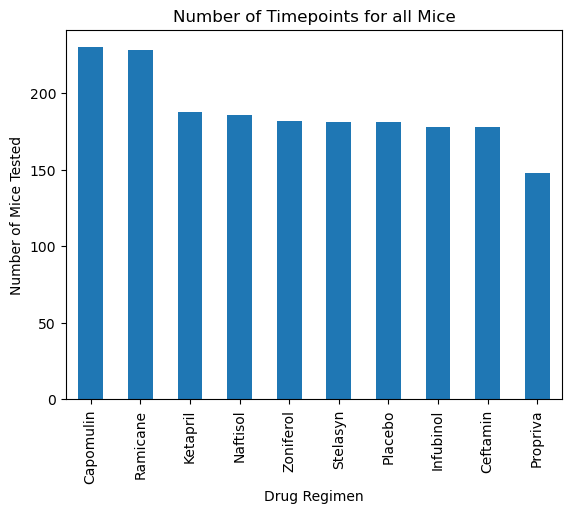

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#use the combined CSV DF created initially: mouse_complete

bar_graph = clean_df["Drug Regimen"].value_counts().plot.bar()

#create titles
bar_graph.set_title("Number of Timepoints for all Mice")
bar_graph.set_xlabel("Drug Regimen")
bar_graph.set_ylabel("Number of Mice Tested")

plt.show()

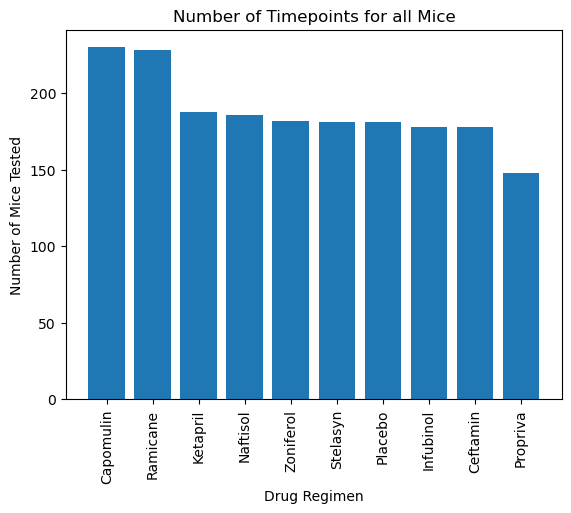

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

vals = clean_df["Drug Regimen"].value_counts()
plt.bar(x=vals.index, height=vals.values)
plt.xticks(rotation=90)

plt.title("Number of Timepoints for all Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

<AxesSubplot:title={'center':'Female vs Male Mice'}, ylabel='Sex'>

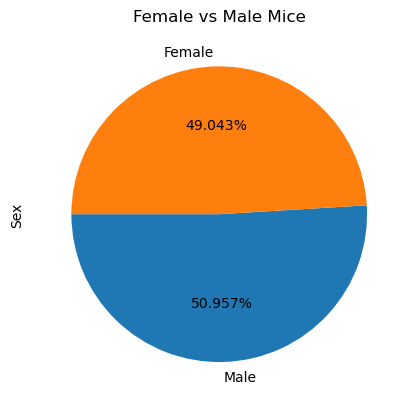

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#differentiate data by M/F

#f = floating poit value


sexdata = clean_df["Sex"].value_counts()

#create the pie chart using this data

mouse_pie = sexdata.plot.pie(autopct="%1.3f%%", startangle=180, title="Female vs Male Mice" )

#display the chart
mouse_pie

In [40]:
sexdata.values

array([958, 922], dtype=int64)

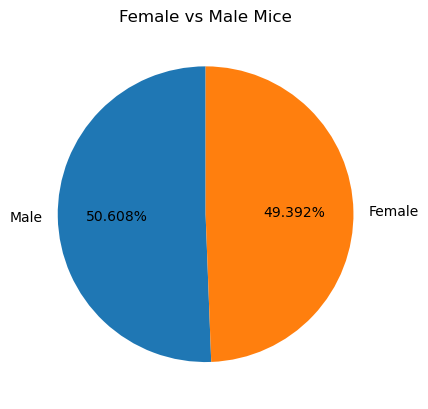

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#differentiate data by M/F
sexdata = mouse_complete["Sex"].value_counts()

#create the pie chart using this data

plt.pie(sexdata.values, labels=sexdata.index, autopct="%1.3f%%", startangle=90)
plt.title("Female vs Male Mice")

#display the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df= clean_df.groupby("Mouse ID").Timepoint.max()
last_timepoint_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df,clean_df, on=["Mouse ID","Timepoint"],how="left")

#display df
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [43]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
#the list looks to be differentiated by drugs, create a subset for the different drugs

mouse_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_drug_values = []

for x in mouse_drugs: 
    #find rows where mouse treated by drug 
    treatment_rows= merged_df.loc[merged_df["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    mouse_drug_values.append(treatment_rows)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#IQR = Q3-Q1 (to find upper and lower bounds)

    quartiles = treatment_rows.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile-lower_quartile
    print(iqr)
    
    upper_bound = upper_quartile+(1.5*iqr)

    lower_bound = lower_quartile-(1.5*iqr)
    
    #filter whether higher or lower bound
    outliers = treatment_rows.loc[(treatment_rows<lower_bound) | (treatment_rows>upper_bound)]
    print(outliers)
    

7.781863460000004
Series([], Name: Tumor Volume (mm3), dtype: float64)
9.098536719999998
Series([], Name: Tumor Volume (mm3), dtype: float64)
11.477135160000003
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
15.577752179999997
Series([], Name: Tumor Volume (mm3), dtype: float64)


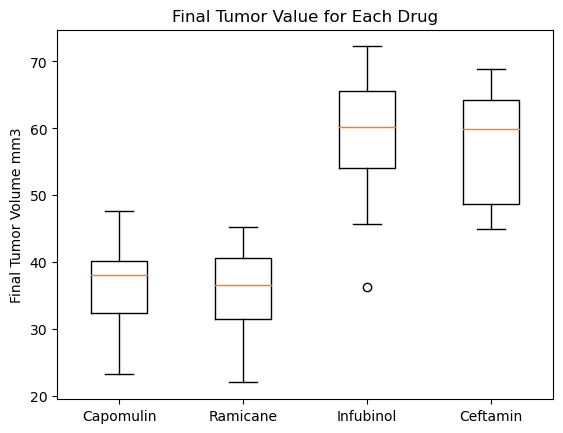

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(mouse_drug_values)

plt.title("Final Tumor Value for Each Drug")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume mm3")

#show graph
plt.show()

## Line and Scatter Plots

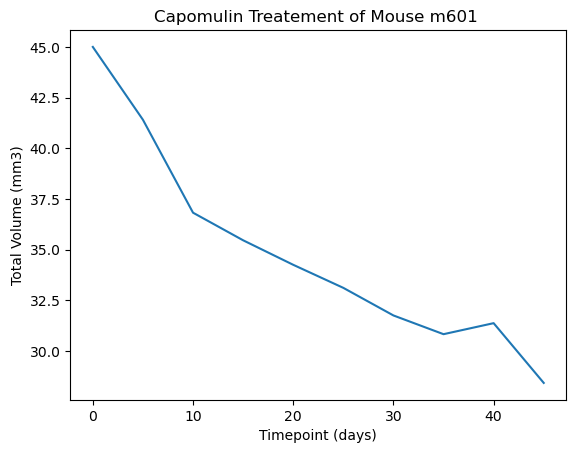

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#identify data points with only capomulin


specific_mouse = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")&(clean_df["Mouse ID"]=="m601")]

plt.plot(specific_mouse["Timepoint"],specific_mouse["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)")
plt.ylabel("Total Volume (mm3)")
plt.title("Capomulin Treatement of Mouse m601 ")

#Show plot
plt.show()
         

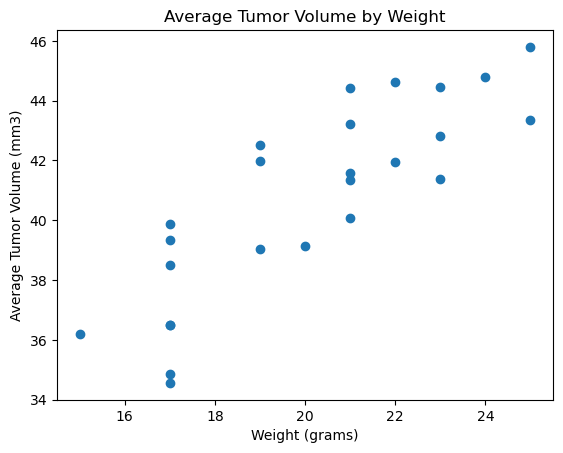

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capomulin_df = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")]

mean_vol = capomulin_df.groupby("Mouse ID").mean()
mean_vol["Tumor Volume (mm3)"],mean_vol["Weight (g)"]

#then create the scatter plot

plt.scatter(mean_vol["Weight (g)"],mean_vol["Tumor Volume (mm3)"])

plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()

## Correlation and Regression

The correlation coefficient is 0.84.


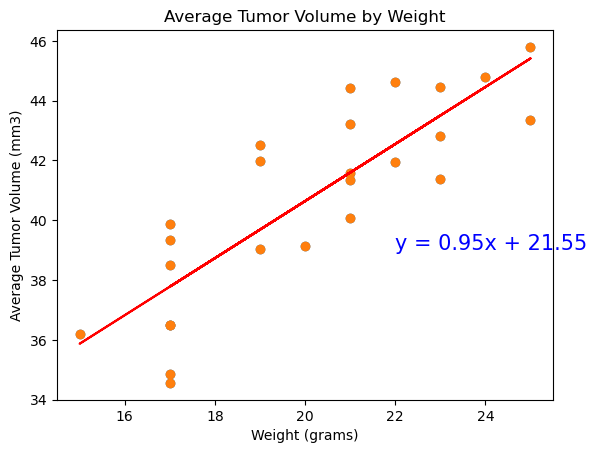

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st

from scipy.stats import linregress

capomulin_df = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")]

mean_vol = capomulin_df.groupby("Mouse ID").mean()
mean_vol["Tumor Volume (mm3)"],mean_vol["Weight (g)"]

#then create the scatter plot

plt.scatter(mean_vol["Weight (g)"],mean_vol["Tumor Volume (mm3)"])

plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")


#calculate corelation coefficient

correlation= st.pearsonr(mean_vol["Weight (g)"],mean_vol["Tumor Volume (mm3)"])

print(f"""The correlation coefficient is {round(correlation[0],2)}.""")

#calculate linear regression 
#y=mx+b

#assign x,y as variables to make things easier

x = mean_vol["Weight (g)"]
y = mean_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot linear regress
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(22,39),fontsize=15,color="blue")

plt.show()
